# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [64]:
import pandas as pd

## imports for Python, Pandas

In [65]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [66]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [67]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

d:\pycharmprojects\springboard\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [68]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

d:\pycharmprojects\springboard\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [69]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [70]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and 
the name is missing. Create a dataframe with the missing names filled in.

In [71]:
# load world bank data project as a dataframe
json_df = pd.read_json('data/world_bank_projects.json')

                                 project_count
countryname                                   
People's Republic of China                  19
Republic of Indonesia                       19
Socialist Republic of Vietnam               17
Republic of India                           16
Republic of Yemen                           13
People's Republic of Bangladesh             12
Nepal                                       12
Kingdom of Morocco                          12
Republic of Mozambique                      11
Africa                                      11


Text(0.5, 0, 'project count')

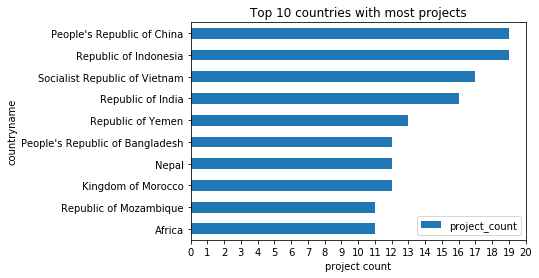

In [72]:
# import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Top ten countries with most projects. A simple groupby and count should work.
df = json_df[['countryname','project_name']].groupby('countryname').count()
df = df.sort_values(by='project_name', ascending=False)[:10]
df.columns = ['project_count']

# print out top 10
print(df)

# Bar plot. Note that we reverse index here since we want to put top country on top
df.iloc[::-1].plot.barh(label='project_count')
plt.title('Top 10 countries with most projects')
plt.xticks(range(0, 21))
plt.xlabel('project count')

Why is there a country with Africa name? Examine closer we see both countryshortname
and country_namecode are also the same for all of them. However, if we look at the 
project name, we see that these are most likely projects for the entire region.

In [73]:
# Country "Africa" project name
json_df[json_df.countryshortname=='Africa'].project_name

45     West Africa  Regional Disease Surveillance Cap...
46     RCIP4 - Regional Communications Infrastructure...
51     Building Resilience through Innovation, Commun...
58     Fighting against wildlife poaching and illegal...
65           Regional Rusumo Falls Hydroelectric Project
99     Additional Financing-West Africa Agricultural ...
167    West Africa Regional Communications Infrastruc...
184    Southern Africa Trade and Transport Facilitati...
287    Agricultural Productivity Program for Southern...
353                 Nile Cooperation for Results Project
449    First Part of the Second Phase of the Niger Ba...
Name: project_name, dtype: object

### Question 2

The second part of this is much faster without loading dataframe and 
using 3 for loops. Lets use string and json normalize here. 

{'1': 'Economic management', '10': 'Rural development', '11': 'Environment and natural resources management', '2': 'Public sector governance', '3': 'Rule of law', '4': 'Financial and private sector development', '5': 'Trade and integration', '6': 'Social protection and risk management', '7': 'Social dev/gender/inclusion', '8': 'Human development', '9': 'Urban development'}

                                              theme_count
code                                                     
Environment and natural resources management          250
Rural development                                     216
Human development                                     210
Public sector governance                              199
Social protection and risk management                 168
Financial and private sector development              146
Social dev/gender/inclusion                           130
Trade and integration                                  77
Urban development                          

d:\pycharmprojects\springboard\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


Text(0.5, 0, 'theme count')

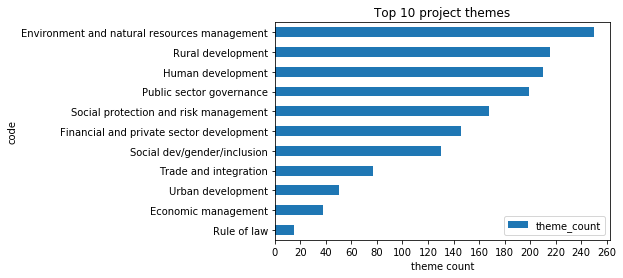

In [74]:
# load json file as string
json_str = json.load((open('data/world_bank_projects.json')))

# Normalize into dataframe
mjtheme_df = json_normalize(json_str, 'mjtheme_namecode')

# Group major theme by code number and get the first element - its name
theme_df = mjtheme_df[mjtheme_df['name'] != ''].groupby('code').first()

# Save the theme to dictionary to map out the name later
theme_dict = theme_df.to_dict().get('name')
print(theme_dict)
print()

# major theme count group by code
df = mjtheme_df.groupby('code').count().sort_values(by='name', ascending=False)

# Adding theme column for pl
df.index = df.index.map(theme_dict.get)
df.columns = ['theme_count']
print(df)
print()

# bar plot
df.iloc[::-1].plot.barh(label='theme_count')
plt.title('Top 10 project themes')
plt.xticks(np.arange(0,261,step=20))
plt.xlabel('theme count')

### Question 3

Again a simple map will be the fastest way to solve this. Note that I only replace
the theme name in 

Note: We can do one liner but explicit is better than implicit.

In [77]:
# Replace the empty theme name '' with np.nan
mjtheme_df = mjtheme_df.replace('', np.nan)

# Using fillna and map to fill in Nan value
mjtheme_df.name = mjtheme_df.name.fillna(mjtheme_df.code.map(theme_dict))

# Check result
mjtheme_df.head(20)




,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion
